In [1]:
from matplotlib.pyplot import figure

figure(figsize=(18, 12), dpi=300)

<Figure size 5400x3600 with 0 Axes>

<Figure size 5400x3600 with 0 Axes>

In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

In [288]:
# Load the dataframe that was saved in read_files.py

default = False

if default:
    df = pd.read_csv("tmp/df.csv", index_col=0)
    labels = ['mean Cd 200', 'mean Cd 400', 'mean Cd 600']
    q = df["mean Cd 200"].quantile(0.999)

else:
    df = pd.read_csv("tmp/training_data.csv",  sep="\t")
    labels = ['cd', 'cl']
     
    df = df[(df["cd"] < 1) & (df["cd"]>-0.5)]



<AxesSubplot:xlabel='u', ylabel='cl'>

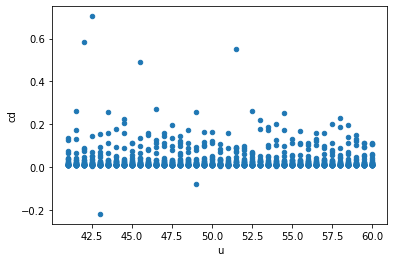

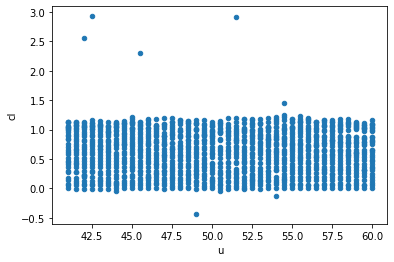

In [289]:
# Exploration for outliers
df.plot.scatter("u","cd")
df.plot.scatter("u","cl")


<AxesSubplot:xlabel='angle', ylabel='cl'>

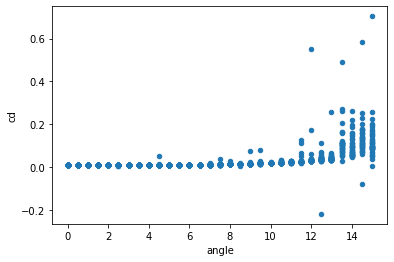

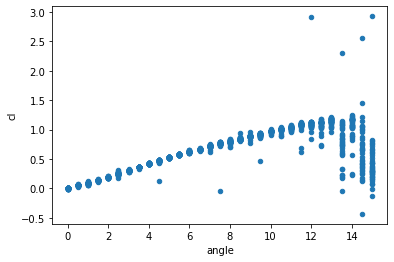

In [311]:
df.plot.scatter("angle","cd")
df.plot.scatter("angle","cl")

In [290]:
train, test = train_test_split(df, test_size=0.2)
train_features = train.copy()
test_features = test.copy()

In [291]:
# Remove the "mean Cd" column from the features and use it as label
train_labels = pd.concat([train_features.pop(x) for x in labels ], axis=1)
#train_labels = train_features.pop('mean Cd')
test_labels = pd.concat([test_features.pop(x) for x in labels], axis=1)
train.shape, test.shape

((951, 4), (238, 4))

In [292]:
n_layers = 6
n_nodes = 32

In [293]:
all_layers = [layers.Dense(n_nodes, activation="relu", name="hidden_layer_"+str(i)) for i in np.arange(n_layers)]
all_layers.append(layers.Dense(10, activation="softmax"))

all_layers.append(layers.Dense(2, name="output_layer"))
model = Sequential(all_layers)


In [294]:
model.compile(optimizer="rmsprop", loss='mean_squared_error')


In [295]:
history = model.fit(
    train_features, train_labels,
    epochs=400,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/400
24/24 [==============================] - 1s 6ms/step - loss: 0.0812 - val_loss: 0.0739
Epoch 2/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0453 - val_loss: 0.0571
Epoch 3/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.0486
Epoch 4/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 0.0429
Epoch 5/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.0417
Epoch 6/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0250 - val_loss: 0.0374
Epoch 7/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.0413
Epoch 8/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.0409
Epoch 9/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0333
Epoch 10/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0330
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0318
Epoch 84/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0354
Epoch 85/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0321
Epoch 86/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0319
Epoch 87/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0309
Epoch 88/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0314
Epoch 89/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0354
Epoch 90/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0350
Epoch 91/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0326
Epoch 92/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0341
Epoch 93/400


24/24 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0325
Epoch 165/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0316
Epoch 166/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0167 - val_loss: 0.0315
Epoch 167/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0317
Epoch 168/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0323
Epoch 169/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0311
Epoch 170/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0173 - val_loss: 0.0316
Epoch 171/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0326
Epoch 172/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0318
Epoch 173/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0165 - val_loss: 0.0332
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0300
Epoch 246/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0310
Epoch 247/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.0300
Epoch 248/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0330
Epoch 249/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0308
Epoch 250/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0299
Epoch 251/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0299
Epoch 252/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0161 - val_loss: 0.0301
Epoch 253/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0152 - val_loss: 0.0296
Epoch 254/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.0294
Epoc

24/24 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0299
Epoch 327/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.0284
Epoch 328/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0293
Epoch 329/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0277
Epoch 330/400
24/24 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0294
Epoch 331/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0294
Epoch 332/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0309
Epoch 333/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0284
Epoch 334/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0129 - val_loss: 0.0292
Epoch 335/400
24/24 [==============================] - 0s 2ms/step - loss: 0.0138 - val_loss: 0.0271
Epoc

===============================Test===============================
8/8 [==============================] - 0s 877us/step - loss: 0.0220


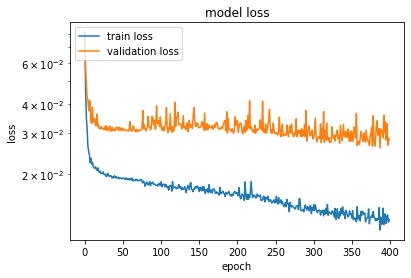

In [296]:
print("==================================================================")
print("===============================Test===============================")
eval_loss = model.evaluate(test_features,test_labels)

# Plot history of train and validation loss
plt.figure()
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.savefig("model_loss_"+str(n_nodes)+"_nodes_"+str(n_layers)+"_layer.png")


In [304]:
model.save('tmp/model')


INFO:tensorflow:Assets written to: tmp/model/assets


In [305]:
predicted = model.predict(test_features)

In [306]:
predicted[:,0].shape, test_labels["cd"].shape

((238,), (238,))

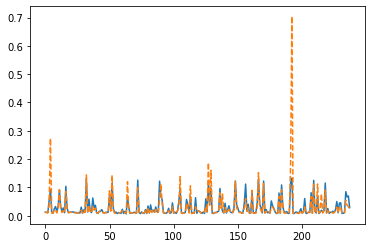

In [307]:
plt.plot(predicted[:,0])
plt.plot(test_labels["cd"].values, "--")
plt.savefig("cd.png")

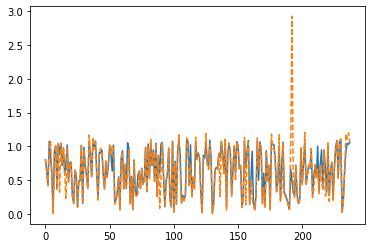

In [308]:
plt.plot(predicted[:,1])
plt.plot(test_labels["cl"].values, "--")
plt.savefig("cl.png")

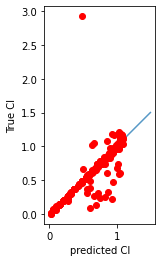

In [313]:
fig, ax = plt.subplots()

ax.scatter(predicted[:,1], test_labels["cl"].values, c="red" )
ax.set_xlabel("predicted Cl")
ax.set_ylabel("True Cl")
 
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot((0,1.5), (0, 1.5), alpha=0.75, zorder=0)
ax.set_aspect('equal')


(0.0, 0.2)

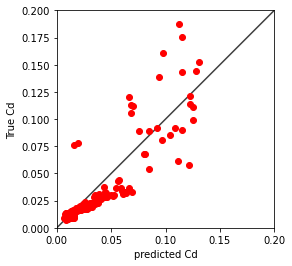

In [317]:
fig, ax = plt.subplots()

ax.scatter(predicted[:,0], test_labels["cd"].values, c="red" )
ax.set_xlabel("predicted Cd")
ax.set_ylabel("True Cd")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim((0,0.2))
ax.set_ylim((0,0.2))
#plt.plot([0, 0.014])

In [232]:
model.evaluate(test_features, test_labels)

8/8 [==============================] - 0s 952us/step - loss: 0.0789


0.0788598358631134

In [21]:
model.predict(x=[[51.4815, 0]])

array([[0.01020606, 0.02043524]], dtype=float32)

In [22]:
model.predict(x=[[51.4815, 5]])

array([[0.01254354, 0.5557283 ]], dtype=float32)

In [23]:
model.predict(x=[[51.4815, 10]])

array([[0.02255384, 0.9609469 ]], dtype=float32)

In [24]:
model.predict(x=[[51.4815, 15]])

array([[0.11666913, 0.30919284]], dtype=float32)

In [38]:
nasa=pd.read_csv("nasa.dat", sep="\s+", names=["angle","cl","cd"])

In [39]:
nasa

,angle,cl,cd
0,-4.04,-0.4417,0.00871
1,-2.14,-0.2385,0.00800
2,-0.05,-0.0126,0.00809
3,2.05,0.2125,0.00816
4,4.04,0.4316,0.00823
5,6.09,0.6546,0.00885
6,8.30,0.8873,0.01050
7,10.12,1.0707,0.01201
8,11.13,1.1685,0.01239
9,12.12,1.2605,0.01332


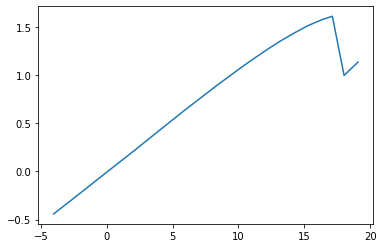

In [42]:
plt.plot(nasa["angle"], nasa["cl"])

In [44]:
nasa["u"] = 51.4815
nasa.head()

,angle,cl,cd,u
0,-4.04,-0.4417,0.00871,51.4815
1,-2.14,-0.2385,0.00800,51.4815
2,-0.05,-0.0126,0.00809,51.4815
3,2.05,0.2125,0.00816,51.4815
4,4.04,0.4316,0.00823,51.4815


In [ ]:
nasa_predict = model.predict(nasa["a"])

In [46]:
test_features = nasa[["u", "angle"]]

In [47]:
test_features

,u,angle
0,51.4815,-4.04
1,51.4815,-2.14
2,51.4815,-0.05
3,51.4815,2.05
4,51.4815,4.04
5,51.4815,6.09
6,51.4815,8.30
7,51.4815,10.12
8,51.4815,11.13
9,51.4815,12.12


In [48]:
nasa_predict = model.predict(test_features)

In [53]:
nasa_predict.shape

(17, 2)

In [54]:
nasa.shape

(17, 4)

(0.0, 14.0)

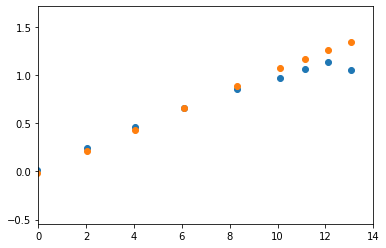

In [64]:
plt.scatter(nasa["angle"], nasa_predict[:,1])
plt.scatter(nasa["angle"], nasa["cl"])

(0.0, 0.08)

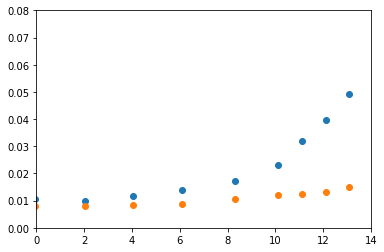

In [70]:
plt.scatter(nasa["angle"], nasa_predict[:,0])
plt.scatter(nasa["angle"], nasa["cd"])
plt.xlim(0,14)
plt.ylim(0,0.08)

In [ ]:
np.arange([])